<center><h1> PART 01 : Initial Data Scraping and Data Loading</h1></center>


<h2>🗒️ This notebook is divided in 4 sections:</h2>

<h4>1. Scraping the arXiv website for scientific papers using the arXiv API,</h4>
<h4>2. Performing some basic data cleaning and feature engineering,</h4>
<h4>3. Connect to the Hopsworks feature store,</h4>
<h4>4. Create feature groups and upload them to the feature store.</h4>



## 1. ArXiv Scapring

In this section, we scrape the arXiv website for papers in the category "cs.CV" (Computer Vision), "stat.ML" / "cs.LG" (Machine Learning) and "cs.AI" (Artificial Intelligence). The papers are then saved in a csv file.

## IMPORT LIBRARIES

In [1]:
import arxiv
import pandas as pd
from tqdm import tqdm
from pathlib import Path

## Let's start by defining a list of keywords that we will use to query the arXiv API.

In [2]:
query_keywords = [
    "\"image segmentation\"",
    "\"self-supervised learning\"",
    "\"representation learning\"",
    "\"image generation\"",
    "\"object detection\"",
    "\"transfer learning\"",
    "\"transformers\"",
    "\"adversarial training\"",
    "\"generative adversarial networks\"",
    "\"model compression\"",
    "\"few-shot learning\"",
    "\"natural language processing\"",
    "\"graph neural networks\"",
    "\"colorization\"",
    "\"depth estimation\"",
    "\"point cloud\"",
    "\"structured data\"",
    "\"optical flow\"",
    "\"reinforcement learning\"",
    "\"super resolution\"",
    "\"attention mechanisms\"",
    "\"tabular data\"",
    "\"unsupervised learning\"",
    "\"semi-supervised learning\"",
    "\"explainable AI\"",
    "\"radiance field\"",
    "\"decision tree\"",
    "\"time series analysis\"",
    "\"molecule generation\"",
    "\"large language models\"",
    "\"LLMs\"",
    "\"language models\"",
    "\"image classification\"",
    "\"document image classification\"",
    "\"encoder-decoder\"",
    "\"multimodal learning\"",
    "\"multimodal deep learning\"",
    "\"speech recognition\"",
    "\"generative models\"",
    "\"anomaly detection\"",
    "\"recommender systems\"",
    "\"robotics\"",
    "\"knowledge graphs\"",
    "\"cross-modal learning\"",
    "\"attention mechanisms\"",
    "\"unsupervised translation\"",
    "\"machine translation\"",
    "\"dialogue systems\"",
    "\"sentiment analysis\"",
    "\"question answering\"",
    "\"text summarization\"",
    "\"sequential modeling\"",
    "\"neurosymbolic AI\"",
    "\"fairness in AI\"",
    "\"transferable skills\"",
    "\"data augmentation\"",
    "\"neural architecture search\"",
    "\"active learning\"",
    "\"automated machine learning\"",
    "\"meta-learning\"",
    "\"domain adaptation\"",
    "\"time series forecasting\"",
    "\"weakly supervised learning\"",
    "\"self-supervised vision\"",
    "\"visual reasoning\"",
    "\"knowledge distillation\"",
    "\"hyperparameter optimization\"",
    "\"cross-validation\"",
    "\"explainable reinforcement learning\"",
    "\"meta-reinforcement learning\"",
    "\"generative models in NLP\"",
    "\"knowledge representation and reasoning\"",
    "\"zero-shot learning\"",
    "\"self-attention mechanisms\"",
    "\"ensemble learning\"",
    "\"online learning\"",
    "\"cognitive computing\"",
    "\"self-driving cars\"",
    "\"emerging AI trends\"",
    "\"Attention is all you need\"",
    "\"GPT\"",
    "\"BERT\"",
    "\"Transformers\"",
    "\"yolo\"",
    "\"speech recognisation\"",
    "\"LSTM\"",
    "\"GRU\"",
    "\"BERT - Bidirectinal Encoder Representation of Transformes\"",
    "\"Large Language Model\" ",
    "\"Stabel diffusion\"",
    "\"Attention is all you need\"",
    "\"Encoder-Decoder\"",
     "\"Paper Recommendatin systems\"",
     "\" Latent Dirichlet Allocation (LDA)\"",
     "\"Transformers\"",
     "\"Generative Pre-trained Transforme\"",
    
    
]


Afterwards, we define a function that creates a search object using the given query. It sets the maximum number of results for each category to 6000 and sorts them by the last updated date.

In [3]:
client = arxiv.Client(num_retries=20, page_size=500)



def query_with_keywords(query) -> tuple:
    """
    Query the arXiv API for research papers based on a specific query and filter results by selected categories.
    
    Args:
        query (str): The search query to be used for fetching research papers from arXiv.
    
    Returns:
        tuple: A tuple containing three lists - terms, titles, and abstracts of the filtered research papers.
        
            terms (list): A list of lists, where each inner list contains the categories associated with a research paper.
            titles (list): A list of titles of the research papers.
            abstracts (list): A list of abstracts (summaries) of the research papers.
            urls (list): A list of URLs for the papers' detail page on the arXiv website.
    """
    
    # Create a search object with the query and sorting parameters.
    search = arxiv.Search(
        query=query,
        max_results=6000,
        sort_by=arxiv.SortCriterion.LastUpdatedDate
    )
    
    # Initialize empty lists for terms, titles, abstracts, and urls.
    terms = []
    titles = []
    abstracts = []
    urls = []
    ids = []
    # For each result in the search...
    for res in tqdm(client.results(search), desc=query):
        # Check if the primary category of the result is in the specified list.
        if res.primary_category in ["cs.CV", "stat.ML", "cs.LG", "cs.AI" ,"cs.CL"]:
            # If it is, append the result's categories, title, summary, and url to their respective lists.
            terms.append(res.categories)
            titles.append(res.title)
            abstracts.append(res.summary)
            urls.append(res.entry_id)
            ids.append(res.entry_id.split('/')[-1])

    # Return the four lists.
    return terms, titles, abstracts, urls , ids

In [4]:
all_titles = []
all_abstracts = []
all_terms = []
all_urls = []
all_ids = []

for query in query_keywords:
    terms, titles, abstracts, urls , ids = query_with_keywords(query)
    all_titles.extend(titles)
    all_abstracts.extend(abstracts)
    all_terms.extend(terms)
    all_urls.extend(urls)
    all_ids.extend(ids)

"image segmentation": 3316it [01:38, 33.74it/s]
"self-supervised learning": 0it [00:05, ?it/s]
"representation learning": 6000it [03:49, 26.19it/s]
"image generation": 2572it [01:36, 26.62it/s]
"object detection": 6000it [04:02, 24.79it/s]
"transfer learning": 5637it [03:03, 30.76it/s]
"transformers": 6000it [03:36, 27.66it/s]
"adversarial training": 2848it [01:34, 30.24it/s]
"generative adversarial networks": 5997it [03:11, 31.23it/s]
"model compression": 801it [00:27, 28.83it/s]
"few-shot learning": 0it [00:03, ?it/s]
"natural language processing": 6000it [03:39, 27.29it/s]
"graph neural networks": 5086it [03:03, 27.66it/s]
"colorization": 6000it [03:45, 26.65it/s]
"depth estimation": 1389it [00:38, 36.42it/s]
"point cloud": 5066it [02:53, 29.16it/s]
"structured data": 2108it [01:03, 32.96it/s]
"optical flow": 1654it [01:03, 26.03it/s]
"reinforcement learning": 6000it [04:12, 23.81it/s]
"super resolution": 3234it [01:34, 34.21it/s]
"attention mechanisms": 5503it [02:40, 34.38it/s]
"t

In [ ]:
arxiv_data = pd.DataFrame({
    'titles': all_titles,
    'abstracts': all_abstracts,
    'terms': all_terms,
    'urls': all_urls,
    'ids' : all_ids
})
# t7kZu4L4ARaOBs8YLTQlT4OlPSfB7FBs1ugE4JYQ

In [ ]:
arxiv_data_indexed = pd.DataFrame({
    'titles': all_titles,
    'abstracts': all_abstracts,
    'terms': all_terms,
    'urls': all_urls,
    'ids' : all_ids
})

In [72]:
arxiv_data_indexed.reset_index(inplace=True)
arxiv_data_indexed.rename(columns = {'index':'id'}, inplace=True)

In [ ]:
# t7kZu4L4ARaOBs8YLTQlT4OlPSfB7FBs1ugE4JYQ

In [28]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import ast
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import  Counter
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soulo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soulo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
arxiv_data.head()

,titles,abstracts,terms,urls,ids
0,Multispectral Image Segmentation in Agricultur...,Multispectral imagery is frequently incorporat...,[cs.CV],http://arxiv.org/abs/2308.00159v1,2308.00159v1
1,Investigating and Improving Latent Density Seg...,"Data uncertainties, such as sensor noise or oc...",[cs.CV],http://arxiv.org/abs/2307.16694v1,2307.16694v1
2,DiffPose: SpatioTemporal Diffusion Model for V...,Denoising diffusion probabilistic models that ...,[cs.CV],http://arxiv.org/abs/2307.16687v1,2307.16687v1
3,Domain Adaptation for Medical Image Segmentati...,Models capable of leveraging unlabelled data a...,[cs.CV],http://arxiv.org/abs/2307.16660v1,2307.16660v1
4,3D Medical Image Segmentation with Sparse Anno...,Medical image segmentation typically necessita...,[cs.CV],http://arxiv.org/abs/2307.16256v1,2307.16256v1


In [44]:
# PATH_DATA_BASE = Path.cwd().parent / "data"

In [45]:
# arxiv_data.to_csv(PATH_DATA_BASE / 'papers_data.csv', index=False)

In [47]:
# arxiv_data_indexed.to_csv(PATH_DATA_BASE / 'papers_data_indexed.csv', index=False)

### The scarped data is saved as data.csv in data folder and filterd/cleaned data is saved as Filtered_arxiv_papers.csv in data folder

<center><h1>2. EDA and Data Preprocessing</h1></center>

## IMPORT LIBRARIES

In [57]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import ast

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import  Counter
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soulo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soulo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
PATH_DATA_BASE = Path.cwd().parent / "data"

## Load the data 

In [60]:
pd.set_option('display.max_colwidth', None)
arxiv_data = pd.read_csv(PATH_DATA_BASE / "data.csv")

In [74]:
arxiv_data_indexed.head()

,id,titles,abstracts,terms,urls,ids
0,0,Multispectral Image Segmentation in Agriculture: A Comprehensive Study on Fusion Approaches,"Multispectral imagery is frequently incorporated into agricultural tasks,\nproviding valuable support for applications such as image segmentation, crop\nmonitoring, field robotics, and yield estimation. From an image segmentation\nperspective, multispectral cameras can provide rich spectral information,\nhelping with noise reduction and feature extraction. As such, this paper\nconcentrates on the use of fusion approaches to enhance the segmentation\nprocess in agricultural applications. More specifically, in this work, we\ncompare different fusion approaches by combining RGB and NDVI as inputs for\ncrop row detection, which can be useful in autonomous robots operating in the\nfield. The inputs are used individually as well as combined at different times\nof the process (early and late fusion) to perform classical and DL-based\nsemantic segmentation. In this study, two agriculture-related datasets are\nsubjected to analysis using both deep learning (DL)-based and classical\nsegmentation methodologies. The experiments reveal that classical segmentation\nmethods, utilizing techniques such as edge detection and thresholding, can\neffectively compete with DL-based algorithms, particularly in tasks requiring\nprecise foreground-background separation. This suggests that traditional\nmethods retain their efficacy in certain specialized applications within the\nagricultural domain. Moreover, among the fusion strategies examined, late\nfusion emerges as the most robust approach, demonstrating superiority in\nadaptability and effectiveness across varying segmentation scenarios. The\ndataset and code is available at https://github.com/Cybonic/MISAgriculture.git.",[cs.CV],http://arxiv.org/abs/2308.00159v1,2308.00159v1
1,1,Investigating and Improving Latent Density Segmentation Models for Aleatoric Uncertainty Quantification in Medical Imaging,"Data uncertainties, such as sensor noise or occlusions, can introduce\nirreducible ambiguities in images, which result in varying, yet plausible,\nsemantic hypotheses. In Machine Learning, this ambiguity is commonly referred\nto as aleatoric uncertainty. Latent density models can be utilized to address\nthis problem in image segmentation. The most popular approach is the\nProbabilistic U-Net (PU-Net), which uses latent Normal densities to optimize\nthe conditional data log-likelihood Evidence Lower Bound. In this work, we\ndemonstrate that the PU- Net latent space is severely inhomogenous. As a\nresult, the effectiveness of gradient descent is inhibited and the model\nbecomes extremely sensitive to the localization of the latent space samples,\nresulting in defective predictions. To address this, we present the Sinkhorn\nPU-Net (SPU-Net), which uses the Sinkhorn Divergence to promote homogeneity\nacross all latent dimensions, effectively improving gradient-descent updates\nand model robustness. Our results show that by applying this on public datasets\nof various clinical segmentation problems, the SPU-Net receives up to 11%\nperformance gains compared against preceding latent variable models for\nprobabilistic segmentation on the Hungarian-Matched metric. The results\nindicate that by encouraging a homogeneous latent space, one can significantly\nimprove latent density modeling for medical image segmentation.",[cs.CV],http://arxiv.org/abs/2307.16694v1,2307.16694v1
2,2,DiffPose: SpatioTemporal Diffusion Model for Video-Based Human Pose Estimation,"Denoising diffusion probabilistic models that were initially proposed for\nrealistic image generation have recently shown success in various perception\ntasks (e.g., object detection and image segmentation) and are increasingly\ngaining attention in computer vision. However, extending such models to\nmulti-frame human pose estimation is non-trivial due to the presence of the\nadditional temporal dimension in videos. More impor

In [75]:
print(f"There are {len(arxiv_data_indexed)} rows in the dataset.")

There are 135176 rows in the dataset.


In [76]:
total_duplicate_titles = sum(arxiv_data_indexed["titles"].duplicated())
print(f"There are {total_duplicate_titles} duplicate titles.")

There are 47750 duplicate titles.


##### Note We have already cleaned the data in notebok 02 and saved as filtered_arxiv_paper

# Setting up your MLflow tracking:

In [ ]:
!pip install mlflow --quiet

In [81]:
PATH_DATA_BASE = Path.cwd().parent / "data"

In [82]:
pd.set_option('display.max_colwidth', None)
my_data = pd.read_csv(PATH_DATA_BASE / "Filtered_arxiv_papers.csv")

In [84]:
len(my_data)

87422

In [ ]:
# Start an MLflow run
with mlflow.start_run() as run:
    # Log the data into the run
    mlflow.log_param("num_data", len(my_data))
    
    # Log the DataFrame as an artifact
    mlflow.log_artifact("filtered_arxiv_papers.csv", my_data.to_csv(index=False))
    mlflow.set_experiment_tag("topic", "NLP")
    # Log other information and parameters if needed
    mlflow.set_tag("description", "Cleaned and filtered arXiv papers data")
    
    # ... (log any other relevant parameters)

,titles,abstracts,terms,urls,ids
0,Multispectral Image Segmentation in Agriculture: A Comprehensive Study on Fusion Approaches,"Multispectral imagery is frequently incorporated into agricultural tasks,\nproviding valuable support for applications such as image segmentation, crop\nmonitoring, field robotics, and yield estimation. From an image segmentation\nperspective, multispectral cameras can provide rich spectral information,\nhelping with noise reduction and feature extraction. As such, this paper\nconcentrates on the use of fusion approaches to enhance the segmentation\nprocess in agricultural applications. More specifically, in this work, we\ncompare different fusion approaches by combining RGB and NDVI as inputs for\ncrop row detection, which can be useful in autonomous robots operating in the\nfield. The inputs are used individually as well as combined at different times\nof the process (early and late fusion) to perform classical and DL-based\nsemantic segmentation. In this study, two agriculture-related datasets are\nsubjected to analysis using both deep learning (DL)-based and classical\nsegmentation methodologies. The experiments reveal that classical segmentation\nmethods, utilizing techniques such as edge detection and thresholding, can\neffectively compete with DL-based algorithms, particularly in tasks requiring\nprecise foreground-background separation. This suggests that traditional\nmethods retain their efficacy in certain specialized applications within the\nagricultural domain. Moreover, among the fusion strategies examined, late\nfusion emerges as the most robust approach, demonstrating superiority in\nadaptability and effectiveness across varying segmentation scenarios. The\ndataset and code is available at https://github.com/Cybonic/MISAgriculture.git.",[cs.CV],http://arxiv.org/abs/2308.00159v1,2308.00159v1


#### Length of the Data

In [53]:
print(f"There are {len(arxiv_data)} rows in the dataset.")

There are 87426 rows in the dataset.


#### Checking the shape and size of the data

In [17]:
arxiv_data.size

675880

In [18]:
arxiv_data.shape

(135176, 5)

In [20]:
arxiv_data.memory_usage()

Index            128
titles       1081408
abstracts    1081408
terms        1081408
urls         1081408
ids          1081408
dtype: int64

In [21]:
arxiv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135176 entries, 0 to 135175
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   titles     135176 non-null  object
 1   abstracts  135176 non-null  object
 2   terms      135176 non-null  object
 3   urls       135176 non-null  object
 4   ids        135176 non-null  object
dtypes: object(5)
memory usage: 5.2+ MB


In [22]:
arxiv_data.isnull().sum()

titles       0
abstracts    0
terms        0
urls         0
ids          0
dtype: int64

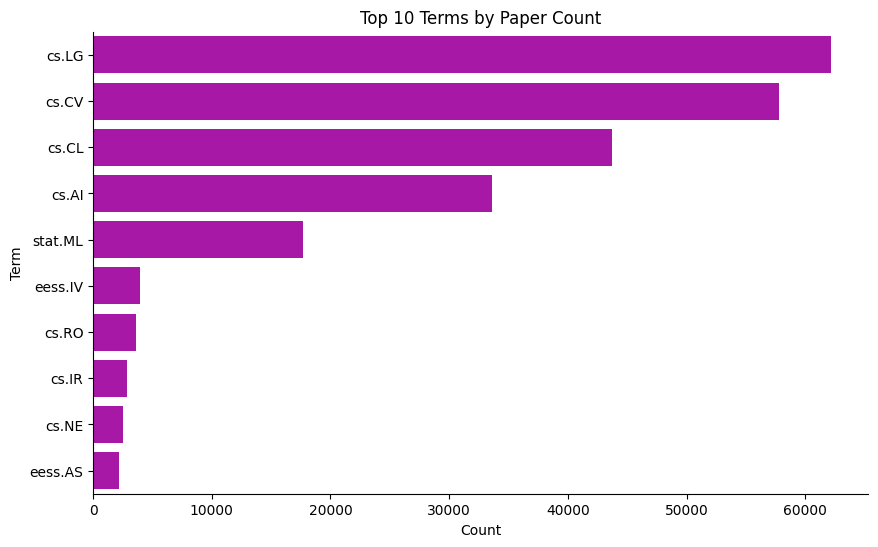

In [29]:
# Get all terms
all_terms = [term for sublist in arxiv_data['terms'].tolist() for term in sublist]

# Count terms
terms_count = Counter(all_terms)

# Create dataframe
df_terms = pd.DataFrame.from_dict(terms_count, orient='index').reset_index()
df_terms.columns = ['Term', 'Count']

# Sort by count and take the top 10
df_terms_top10 = df_terms.sort_values('Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Term', data=df_terms_top10, color='m' , saturation=0.75)

# Remove top and right spines
sns.despine()

plt.title('Top 10 Terms by Paper Count')
plt.show()

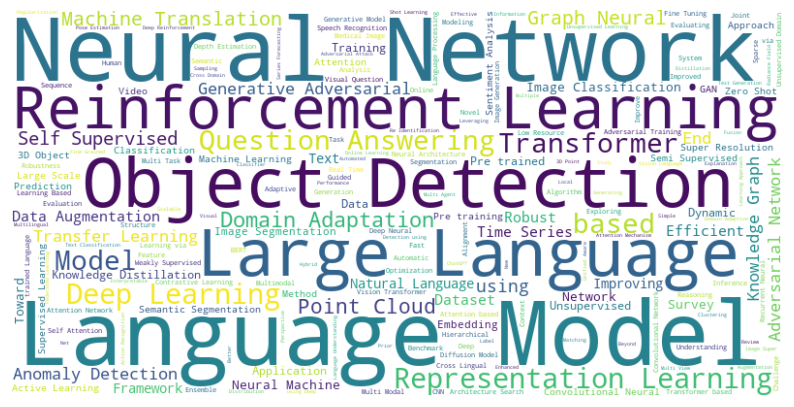

In [30]:
from wordcloud import WordCloud

# Concatenate all titles
all_titles = ' '.join(arxiv_data['titles'].tolist())

# Create word cloud
wordcloud = WordCloud(background_color = 'white', width=800, height=400).generate(all_titles)

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Lets drop the duplicate value and proceed

In [32]:
arxiv_data = arxiv_data[~arxiv_data['titles'].duplicated()] #  It returns a new DataFrame that only contains the rows that are not duplicates.

print(f"Now there are {len(arxiv_data)}  rows in the dataset")

Now there are 87426  rows in the dataset


## Saved Filtered Data


In [52]:
# arxiv_data.to_csv(PATH_DATA_BASE / 'filtered_papers.csv' ,index=False)